In [113]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
#Reading Data
accepts = pd.read_csv('./data/chefmozaccepts.csv')
cuisine = pd.read_csv('./data/chefmozcuisine.csv')
hours = pd.read_csv('./data/chefmozhours4.csv')
parking = pd.read_csv('./data/chefmozparking.csv')
geo = pd.read_csv('./data/geoplaces2.csv') 
usercuisine = pd.read_csv('./data/usercuisine.csv')
payment = pd.read_csv('./data/userpayment.csv')
profile = pd.read_csv('./data/userprofile.csv')
rating = pd.read_csv('./data/rating_final.csv')

In [115]:
#data frame for chefmozaccepts
accepts.head()

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


In [116]:
#Getting information of shape and size
accepts.info()
accepts.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 2 columns):
placeID     1314 non-null int64
Rpayment    1314 non-null object
dtypes: int64(1), object(1)
memory usage: 20.6+ KB


(1314, 2)

In [117]:
#Describe the dataset
accepts['Rpayment'].describe()

count     1314
unique      12
top       cash
freq       500
Name: Rpayment, dtype: object

Text(0, 0.5, 'count')

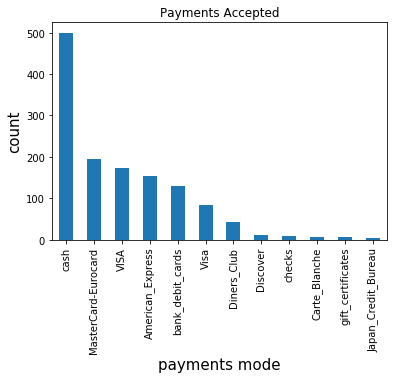

In [118]:
# plot to visualise most accepted payments by Restaurants
acceptsplt=accepts.Rpayment.value_counts().plot.bar(title="Payments Accepted")
acceptsplt.set_xlabel('payments mode',size=15)
acceptsplt.set_ylabel('count',size=15)

In [6]:
#checking for null value
accepts.isnull().sum()

placeID     0
Rpayment    0
dtype: int64

In [7]:
#encoding labele
accepts['Rpayment'] = accepts['Rpayment'].factorize()[0]

In [8]:
accepts.head()

,placeID,Rpayment
0,135110,0
1,135110,1
2,135110,2
3,135110,3
4,135110,4


In [9]:
#data frame for chefmozcuisine
cuisine.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [10]:
#Getting information of shape and size
cuisine.info()
cuisine.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
placeID     916 non-null int64
Rcuisine    916 non-null object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


(916, 2)

In [11]:
#Describe the dataset
cuisine['Rcuisine'].describe()

count         916
unique         59
top       Mexican
freq          239
Name: Rcuisine, dtype: object

Text(0, 0.5, 'count')

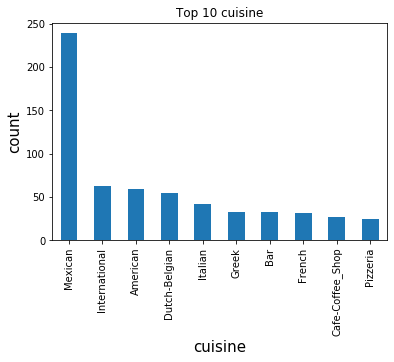

In [119]:
#plot to visualize top cuisines offered by the restaurants
cuisineplt=cuisine.Rcuisine.value_counts()[:10].plot.bar(title="Top 10 cuisine")
cuisineplt.set_xlabel('cuisine',size=15)
cuisineplt.set_ylabel('count',size=15)

In [12]:
#Checking for null value
cuisine.isnull().sum()

placeID     0
Rcuisine    0
dtype: int64

In [13]:
cuisine['Rcuisine'] = cuisine['Rcuisine'].factorize()[0]

In [14]:
cuisine.head()

,placeID,Rcuisine
0,135110,0
1,135109,1
2,135107,2
3,135106,3
4,135105,4


In [15]:
hours.head()

,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;


In [16]:
#Getting information of shape and size
hours.info()
hours.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
placeID    2339 non-null int64
hours      2339 non-null object
days       2339 non-null object
dtypes: int64(1), object(2)
memory usage: 54.9+ KB


(2339, 3)

In [17]:
hours['days'].describe()

count                     2339
unique                       3
top       Mon;Tue;Wed;Thu;Fri;
freq                       793
Name: days, dtype: object

In [18]:
#Split the date
hours[['day1','day2','day3','day4','day5','day6']]= hours.days.str.split(';', expand = True)

In [131]:
#checking for null value
hours.isnull().sum()

placeID    0
hours      0
days       0
dtype: int64

In [20]:
hours.head()

,placeID,hours,days,day1,day2,day3,day4,day5,day6
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;,Mon,Tue,Wed,Thu,Fri,
1,135111,00:00-23:30;,Sat;,Sat,,None,None,None,None
2,135111,00:00-23:30;,Sun;,Sun,,None,None,None,None
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;,Mon,Tue,Wed,Thu,Fri,
4,135110,00:00-00:00;,Sat;,Sat,,None,None,None,None


In [21]:
parking.head()

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


In [22]:
#Getting information about shape and size
parking.info()
parking.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
placeID        702 non-null int64
parking_lot    702 non-null object
dtypes: int64(1), object(1)
memory usage: 11.0+ KB


(702, 2)

In [23]:
parking['parking_lot'].describe()

count      702
unique       7
top       none
freq       348
Name: parking_lot, dtype: object

Text(0, 0.5, 'count')

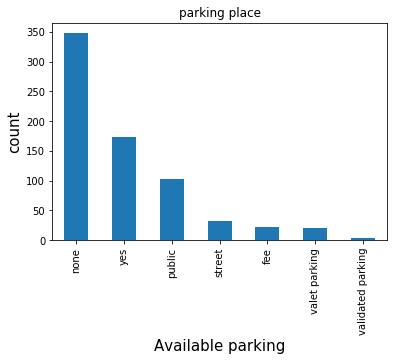

In [120]:
#plot to visualize available parking place at the Restaurants
parkingplt=parking.parking_lot.value_counts().plot.bar(title="parking place")
parkingplt.set_xlabel('Available parking',size=15)
parkingplt.set_ylabel('count',size=15)

In [24]:
#checking for null value
parking.isnull().sum()

placeID        0
parking_lot    0
dtype: int64

In [25]:
parking['parking_lot'] = parking['parking_lot'].factorize()[0]

In [26]:
parking.head()

,placeID,parking_lot
0,135111,0
1,135110,1
2,135109,1
3,135108,1
4,135107,1


In [27]:
geo.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rinc�n de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [28]:
#Getting information of shape and size
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 21 columns):
placeID           130 non-null int64
latitude          130 non-null float64
longitude         130 non-null float64
the_geom_meter    130 non-null object
name              130 non-null object
address           130 non-null object
city              130 non-null object
state             130 non-null object
country           130 non-null object
fax               130 non-null object
zip               130 non-null object
alcohol           130 non-null object
smoking_area      130 non-null object
dress_code        130 non-null object
accessibility     130 non-null object
price             130 non-null object
url               130 non-null object
Rambience         130 non-null object
franchise         130 non-null object
area              130 non-null object
other_services    130 non-null object
dtypes: float64(2), int64(1), object(18)
memory usage: 21.4+ KB


In [29]:
geo.shape

(130, 21)

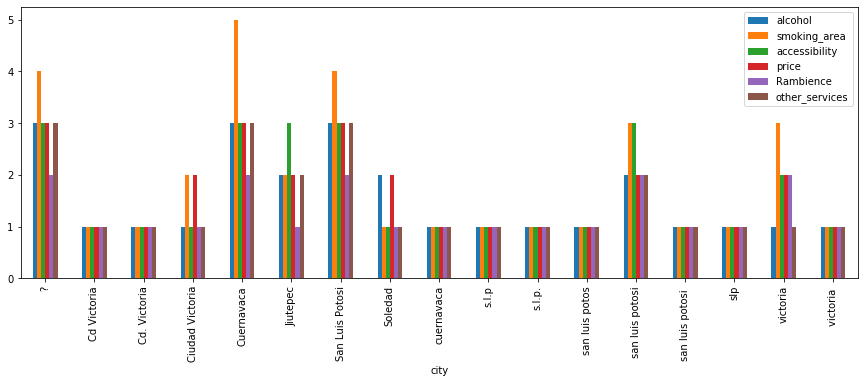

In [129]:
#plot for facilities provided by Restaurants based on city.
geoplt=geo.groupby('city')['alcohol','smoking_area','accessibility','price','Rambience','other_services'].nunique().plot.bar(figsize=(15,5))

In [30]:
#replacing unknown value with Nan.
georep=geo.replace('?', np.nan)

In [31]:
#finding missing value with percentage
missing=georep.isnull().sum()
percent_missing = georep.isnull().sum() * 100 / len(georep)
missing_value_georep = pd.DataFrame({'missing_value':missing,'percent_missing': percent_missing})
missing_value_georep

,missing_value,percent_missing
placeID,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
the_geom_meter,0,0.000000
name,0,0.000000
address,27,20.769231
city,18,13.846154
state,18,13.846154
country,28,21.538462
fax,130,100.000000


In [32]:
#dropping columns with more than 50% missing values
geo.drop(['fax','zip','url'],axis=1,inplace = True)

In [33]:
# replacing remaining colvalues with mode
for column in geo.columns:geo[column].fillna(geo[column].mode()[0], inplace=True)

In [34]:
#encoding lable
geo['the_geom_meter'] = geo['the_geom_meter'].factorize()[0]
geo['name'] = geo['name'].factorize()[0]
geo['address'] = geo['address'].factorize()[0]
geo['city'] = geo['city'].factorize()[0]
geo['state'] = geo['state'].factorize()[0]
geo['country'] = geo['country'].factorize()[0]
geo['alcohol'] = geo['alcohol'].factorize()[0]
geo['smoking_area'] = geo['smoking_area'].factorize()[0]
geo['dress_code'] = geo['dress_code'].factorize()[0]
geo['accessibility'] = geo['accessibility'].factorize()[0]
geo['price'] = geo['price'].factorize()[0]
geo['Rambience'] = geo['Rambience'].factorize()[0]
geo['franchise'] = geo['franchise'].factorize()[0]
geo['area'] = geo['area'].factorize()[0]
geo['other_services'] = geo['other_services'].factorize()[0]
geo.head(5)

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,132825,22.147392,-100.983092,1,1,1,1,1,1,0,0,0,1,1,0,0,1,0
2,135106,22.149709,-100.976093,2,2,2,2,2,0,1,1,0,2,0,0,0,1,0
3,132667,23.752697,-99.163359,3,3,3,3,3,2,0,0,0,1,1,0,1,0,0
4,132613,23.752903,-99.165076,4,4,4,4,4,0,0,2,0,1,0,0,1,0,0


In [35]:
usercuisine.head()

,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch


In [36]:
#Getting information of shape and size
usercuisine.info()
usercuisine.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 2 columns):
userID      330 non-null object
Rcuisine    330 non-null object
dtypes: object(2)
memory usage: 5.2+ KB


(330, 2)

In [37]:
#describe data
usercuisine['Rcuisine'].describe()

count         330
unique        103
top       Mexican
freq           97
Name: Rcuisine, dtype: object

Text(0, 0.5, 'count')

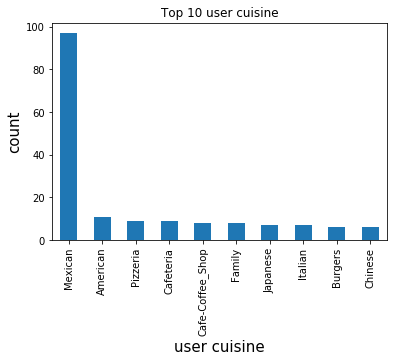

In [121]:
#Top 10 favorite cuisines for the customers
usercuisineplt=usercuisine.Rcuisine.value_counts()[:10].plot.bar(title="Top 10 user cuisine")
usercuisineplt.set_xlabel('user cuisine',size=15)
usercuisineplt.set_ylabel('count',size=15)


In [38]:
#checking for null value
usercuisine.isnull().sum()

userID      0
Rcuisine    0
dtype: int64

In [39]:
usercuisine['Rcuisine'] = usercuisine['Rcuisine'].factorize()[0]
usercuisine.head(5)

,userID,Rcuisine
0,U1001,0
1,U1002,1
2,U1003,1
3,U1004,2
4,U1004,3


In [40]:
payment.head()

,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards


In [41]:
#Getting information of shape and size
payment.info()
payment.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
userID      177 non-null object
Upayment    177 non-null object
dtypes: object(2)
memory usage: 2.8+ KB


(177, 2)

In [42]:
#describe data
payment['Upayment'].describe()

count      177
unique       5
top       cash
freq       131
Name: Upayment, dtype: object

Text(0, 0.5, 'count')

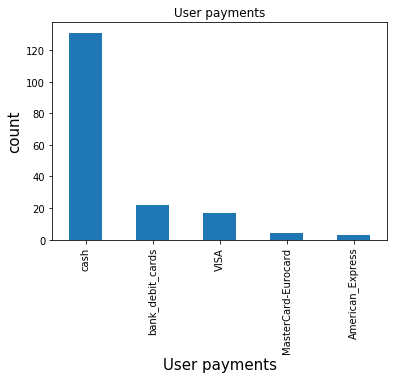

In [123]:
#top type of payments done by the users
paymentplt=payment.Upayment.value_counts().plot.bar(title="User payments")
paymentplt.set_xlabel('User payments',size=15)
paymentplt.set_ylabel('count',size=15)

In [43]:
#checking for null value
payment.isnull().sum()

userID      0
Upayment    0
dtype: int64

In [44]:
payment['Upayment'] = payment['Upayment'].factorize()[0]
payment.head(5)

,userID,Upayment
0,U1001,0
1,U1002,0
2,U1003,0
3,U1004,0
4,U1004,1


In [45]:
profile.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [46]:
#Getting information of shape and size
profile.info()
profile.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 19 columns):
userID              138 non-null object
latitude            138 non-null float64
longitude           138 non-null float64
smoker              138 non-null object
drink_level         138 non-null object
dress_preference    138 non-null object
ambience            138 non-null object
transport           138 non-null object
marital_status      138 non-null object
hijos               138 non-null object
birth_year          138 non-null int64
interest            138 non-null object
personality         138 non-null object
religion            138 non-null object
activity            138 non-null object
color               138 non-null object
weight              138 non-null int64
budget              138 non-null object
height              138 non-null float64
dtypes: float64(3), int64(2), object(14)
memory usage: 20.6+ KB


(138, 19)

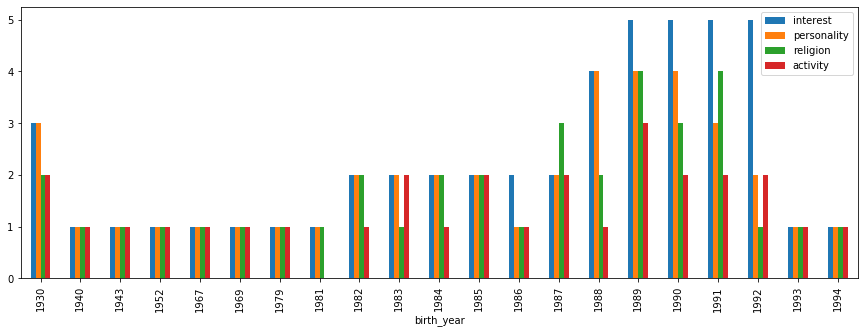

In [126]:
#plot to visualize user's personal info based on birthyear.
profileplt=profilerep.groupby('birth_year')['interest','personality','religion','activity'].nunique().plot.bar(figsize=(15, 5))

In [47]:
# as data contains unknown value, we are replace  with Nan.
profilerep=profile.replace('?', np.nan)

In [48]:
#now we are finding missing value and percent for all variables.
missing=profilerep.isnull().sum()
percent_missing = profilerep.isnull().sum() * 100 / len(profilerep)
missing_value_profilerep = pd.DataFrame({'missing_value':missing,'percent_missing': percent_missing})
missing_value_profilerep

,missing_value,percent_missing
userID,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
smoker,3,2.173913
drink_level,0,0.000000
dress_preference,5,3.623188
ambience,6,4.347826
transport,7,5.072464
marital_status,4,2.898551
hijos,11,7.971014


In [49]:
#and replacing missing value with mode
for column in profile.columns:profile[column].fillna(profile[column].mode()[0], inplace=True)

In [50]:
#lable encoding
profile['smoker'] = profile['smoker'].factorize()[0]
profile['drink_level'] = profile['drink_level'].factorize()[0]
profile['dress_preference'] = profile['dress_preference'].factorize()[0]
profile['ambience'] = profile['ambience'].factorize()[0]
profile['transport'] = profile['transport'].factorize()[0]
profile['marital_status'] = profile['marital_status'].factorize()[0]
profile['hijos'] = profile['hijos'].factorize()[0]
profile['interest'] = profile['interest'].factorize()[0]
profile['personality'] = profile['personality'].factorize()[0]
profile['religion'] = profile['religion'].factorize()[0]
profile['activity'] = profile['activity'].factorize()[0]
profile['color'] = profile['color'].factorize()[0]
profile['budget'] = profile['budget'].factorize()[0]
profile.head(5)

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,0,0,0,0,0,0,0,1989,0,0,0,0,0,69,0,1.77
1,U1002,22.150087,-100.983325,0,0,0,0,1,0,0,1990,1,1,1,0,1,40,1,1.87
2,U1003,22.119847,-100.946527,0,1,1,0,1,0,0,1989,2,2,1,0,2,60,1,1.69
3,U1004,18.867000,-99.183000,0,0,0,0,1,0,0,1940,0,2,0,1,3,44,0,1.53
4,U1005,22.183477,-100.959891,0,0,2,0,1,0,0,1992,2,0,1,0,0,65,0,1.69


In [51]:
rating.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [52]:
rating.info()
rating.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 5 columns):
userID            1161 non-null object
placeID           1161 non-null int64
rating            1161 non-null int64
food_rating       1161 non-null int64
service_rating    1161 non-null int64
dtypes: int64(4), object(1)
memory usage: 45.4+ KB


(1161, 5)

In [53]:
rating.describe()

,placeID,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000,1161.000000
mean,134192.041344,1.199828,1.215332,1.090439
std,1100.916275,0.773282,0.792294,0.790844
min,132560.000000,0.000000,0.000000,0.000000
25%,132856.000000,1.000000,1.000000,0.000000
50%,135030.000000,1.000000,1.000000,1.000000
75%,135059.000000,2.000000,2.000000,2.000000
max,135109.000000,2.000000,2.000000,2.000000


In [54]:
#Data merge
df1=pd.merge(rating,profile)
df2=pd.merge(df1,payment,how='left',on=['userID'])
df3=pd.merge(df2,usercuisine,how='left',on=['userID'])
df4=pd.merge(df3,geo,how='left',on=['placeID'])
df5=pd.merge(df4,parking,how='left',on=['placeID'])
df6=pd.merge(df5,cuisine,how='left',on=['placeID'])
df7=pd.merge(df6,accepts,how='left',on=['placeID'])
rating=df7

In [55]:
len(rating)

10589

In [56]:
rating.head()

,userID,placeID,rating,food_rating,service_rating,latitude_x,longitude_x,smoker,drink_level,dress_preference,...,dress_code,accessibility,price,Rambience,franchise,area,other_services,parking_lot,Rcuisine_y,Rpayment
0,U1077,135085,2,2,2,22.156469,-100.98554,0,1,4,...,0,0,0,0,0,0,0,0,4.0,0.0
1,U1077,135085,2,2,2,22.156469,-100.98554,0,1,4,...,0,0,0,0,0,0,0,0,4.0,0.0
2,U1077,135085,2,2,2,22.156469,-100.98554,0,1,4,...,0,0,0,0,0,0,0,0,4.0,0.0
3,U1077,135038,2,2,1,22.156469,-100.98554,0,1,4,...,0,0,0,0,0,0,0,1,NaN,0.0
4,U1077,135038,2,2,1,22.156469,-100.98554,0,1,4,...,0,0,0,0,0,0,0,1,NaN,0.0


In [57]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10589 entries, 0 to 10588
Data columns (total 45 columns):
userID              10589 non-null object
placeID             10589 non-null int64
rating              10589 non-null int64
food_rating         10589 non-null int64
service_rating      10589 non-null int64
latitude_x          10589 non-null float64
longitude_x         10589 non-null float64
smoker              10589 non-null int64
drink_level         10589 non-null int64
dress_preference    10589 non-null int64
ambience            10589 non-null int64
transport           10589 non-null int64
marital_status      10589 non-null int64
hijos               10589 non-null int64
birth_year          10589 non-null int64
interest            10589 non-null int64
personality         10589 non-null int64
religion            10589 non-null int64
activity            10589 non-null int64
color               10589 non-null int64
weight              10589 non-null int64
budget              10589

In [58]:
rating.shape

(10589, 45)

In [59]:
rating.isnull().any()

userID              False
placeID             False
rating              False
food_rating         False
service_rating      False
latitude_x          False
longitude_x         False
smoker              False
drink_level         False
dress_preference    False
ambience            False
transport           False
marital_status      False
hijos               False
birth_year          False
interest            False
personality         False
religion            False
activity            False
color               False
weight              False
budget              False
height              False
Upayment             True
Rcuisine_x          False
latitude_y          False
longitude_y         False
the_geom_meter      False
name                False
address             False
city                False
state               False
country             False
alcohol             False
smoking_area        False
dress_code          False
accessibility       False
price               False
Rambience   

In [60]:
rating=rating.fillna(0)
rating.isnull().values.any()

False

In [61]:
rating['userID'] = rating['userID'].factorize()[0]
rating.head()

,userID,placeID,rating,food_rating,service_rating,latitude_x,longitude_x,smoker,drink_level,dress_preference,...,dress_code,accessibility,price,Rambience,franchise,area,other_services,parking_lot,Rcuisine_y,Rpayment
0,0,135085,2,2,2,22.156469,-100.98554,0,1,4,...,0,0,0,0,0,0,0,0,4.0,0.0
1,0,135085,2,2,2,22.156469,-100.98554,0,1,4,...,0,0,0,0,0,0,0,0,4.0,0.0
2,0,135085,2,2,2,22.156469,-100.98554,0,1,4,...,0,0,0,0,0,0,0,0,4.0,0.0
3,0,135038,2,2,1,22.156469,-100.98554,0,1,4,...,0,0,0,0,0,0,0,1,0.0,0.0
4,0,135038,2,2,1,22.156469,-100.98554,0,1,4,...,0,0,0,0,0,0,0,1,0.0,0.0


In [62]:
rating.corr()

,userID,placeID,rating,food_rating,service_rating,latitude_x,longitude_x,smoker,drink_level,dress_preference,...,dress_code,accessibility,price,Rambience,franchise,area,other_services,parking_lot,Rcuisine_y,Rpayment
userID,1.000000,0.025201,-0.386553,-0.409473,-0.344992,0.137672,-0.261346,0.026445,0.520703,0.109474,...,0.136657,0.013634,0.194535,0.011749,-0.172339,0.089433,-0.045691,-0.003014,0.050686,-0.017545
placeID,0.025201,1.000000,-0.176534,-0.205929,-0.217031,0.059021,-0.277834,-0.080151,0.130972,-0.110339,...,-0.223136,-0.565126,-0.052074,-0.194075,-0.211232,-0.159016,-0.209117,-0.145058,-0.048966,0.007469
rating,-0.386553,-0.176534,1.000000,0.863767,0.850449,-0.259419,0.277056,0.121624,-0.512939,0.266439,...,-0.036089,0.089251,0.029659,0.118368,0.073942,-0.096336,0.136387,0.101336,0.048537,0.094702
food_rating,-0.409473,-0.205929,0.863767,1.000000,0.811130,-0.271061,0.294702,0.120791,-0.531404,0.247940,...,-0.035452,0.113523,0.022728,0.116830,0.076184,-0.069352,0.155264,0.150852,-0.007264,0.074990
service_rating,-0.344992,-0.217031,0.850449,0.811130,1.000000,-0.271131,0.301348,0.120955,-0.447947,0.246941,...,-0.003241,0.134538,0.009253,0.120061,0.037264,-0.072169,0.146310,0.078689,0.075451,0.094675
latitude_x,0.137672,0.059021,-0.259419,-0.271061,-0.271131,1.000000,-0.678457,-0.057748,0.209176,0.001369,...,-0.030208,-0.171825,0.015093,-0.178138,-0.134790,-0.031866,-0.270156,-0.069899,-0.098625,-0.127048
longitude_x,-0.261346,-0.277834,0.277056,0.294702,0.301348,-0.678457,1.000000,0.055390,-0.252252,0.111021,...,-0.005303,0.285002,-0.043454,0.193999,0.241521,0.068148,0.285537,0.131607,0.068683,0.089665
smoker,0.026445,-0.080151,0.121624,0.120791,0.120955,-0.057748,0.055390,1.000000,-0.011245,0.281752,...,0.023760,0.045581,0.056841,0.046163,-0.001342,-0.004987,0.027822,0.117632,0.005534,0.029776
drink_level,0.520703,0.130972,-0.512939,-0.531404,-0.447947,0.209176,-0.252252,-0.011245,1.000000,-0.073984,...,0.116004,-0.048041,0.137080,-0.108863,-0.244397,0.096241,-0.120893,-0.050703,-0.006796,-0.057804
dress_preference,0.109474,-0.110339,0.266439,0.247940,0.246941,0.001369,0.111021,0.281752,-0.073984,1.000000,...,-0.039393,0.038104,0.131302,0.047032,-0.022367,0.016588,0.098571,0.218645,0.033091,0.014855


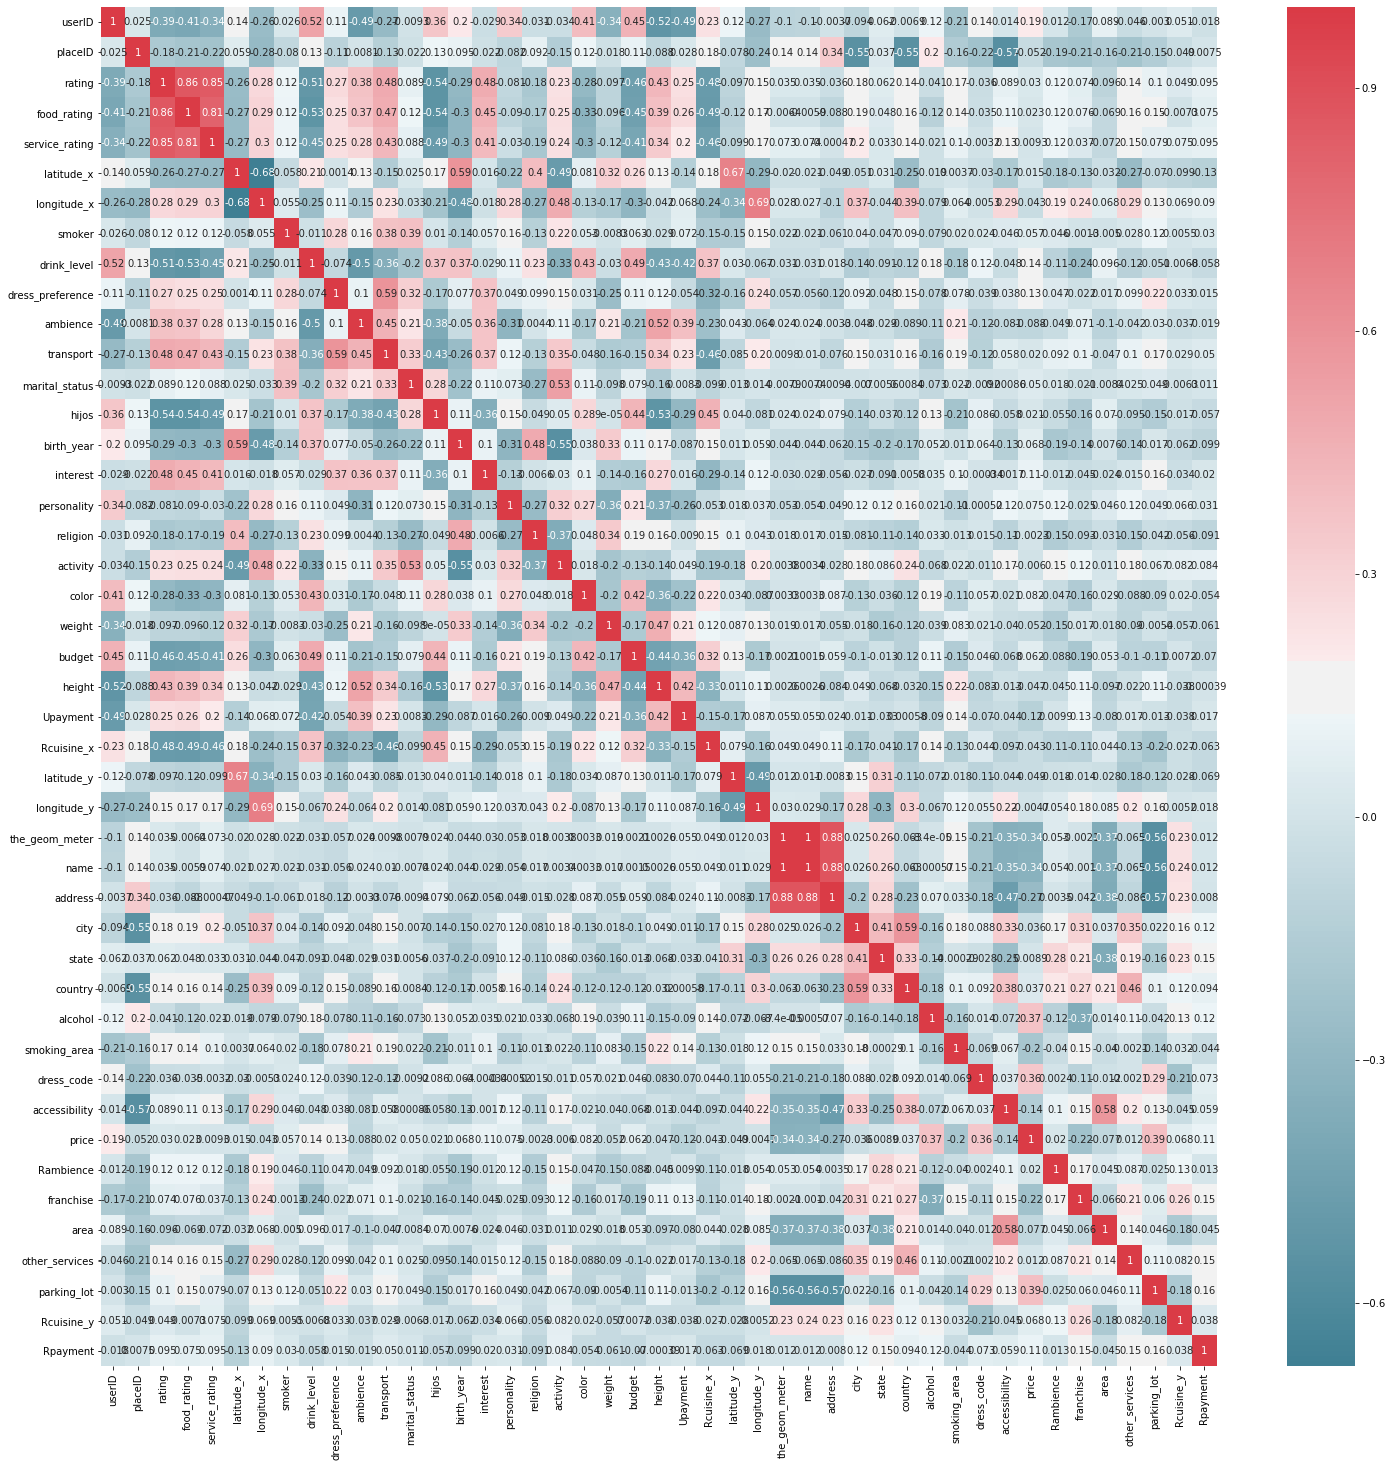

In [63]:
def correlation_heatmap(rating):
    _, ax = plt.subplots(figsize = (25,25))
    colormap= sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(rating.corr(), annot=True, cmap = colormap)

correlation_heatmap(rating)

In [64]:
#packages for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [65]:
# splitting train and test data as 75/25.
X=rating.drop(['placeID','rating','food_rating','service_rating','marital_status','address','parking_lot'],axis=1)
y=rating['rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [66]:
#model building.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/ken/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ken/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
print(logmodel.score(X_train, y_train))

0.7772320866389624


In [111]:
print(logmodel.score(X_test, y_test))

0.7805891238670695


In [ ]:
#predicting on test data.
predict1 =  logmodel.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score
print("confusion matrix")
print(confusion_matrix(y_test,predict1))
print("Accuracy_score")
print(accuracy_score(y_test, predict1))

confusion matrix
[[998  49  82]
 [ 52 348 224]
 [ 47 127 721]]
Accuracy_score
0.7805891238670695


In [72]:
print("classification_report")
print(classification_report(y_test,predict1))

classification_report
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1129
           1       0.66      0.56      0.61       624
           2       0.70      0.81      0.75       895

    accuracy                           0.78      2648
   macro avg       0.76      0.75      0.75      2648
weighted avg       0.78      0.78      0.78      2648



In [88]:
#model building using Decision tree.
decimodel = tree.DecisionTreeClassifier()
decimodel = decimodel.fit(X_train,y_train)

In [89]:
print(decimodel.score(X_train,y_train))

1.0


In [108]:
print(decimodel.score(X_train,y_train))

0.974320241691843


In [ ]:
#predicting on test data.
predict2 =  decimodel.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score
print("confusion matrix")
print(confusion_matrix(y_test,predict2))
print("Accuracy_score")
print(accuracy_score(y_test, predict2))

confusion matrix
[[1110   11    8]
 [  15  598   11]
 [   5   18  872]]
Accuracy_score
0.974320241691843


In [95]:
print("classification_report")
print(classification_report(y_test,predict2))

classification_report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1129
           1       0.95      0.96      0.96       624
           2       0.98      0.97      0.97       895

    accuracy                           0.97      2648
   macro avg       0.97      0.97      0.97      2648
weighted avg       0.97      0.97      0.97      2648



In [102]:
#model building using Random forest.
Randmodel = RandomForestClassifier(max_depth=2, random_state=0) 
Randmodel.fit(X_train,y_train)

/Users/ken/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [103]:
print(Randmodel.score(X_train, y_train))

0.7604835663014734


In [105]:
print(Randmodel.score(X_test, y_test))

0.7594410876132931


In [ ]:
#predicting on test data.
predict3 = Randmodel.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score
print("confusion matrix")
print(confusion_matrix(y_test,predict3))
print("Accuracy_score")
print(accuracy_score(y_test, predict3))

confusion matrix
[[922  15 192]
 [ 22 243 359]
 [  5  44 846]]
Accuracy_score
0.7594410876132931


In [101]:
print("classification_report")
print(classification_report(y_test,predict3))

classification_report
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1129
           1       0.80      0.39      0.52       624
           2       0.61      0.95      0.74       895

    accuracy                           0.76      2648
   macro avg       0.79      0.72      0.72      2648
weighted avg       0.81      0.76      0.75      2648

